<a href="https://colab.research.google.com/github/Sandikadata/E-Commerce-Furniture-/blob/main/Ecommerece_project_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [60]:
!git clone https://github.com/Sandikadata/E-Commerce-Furniture-.git

Cloning into 'E-Commerce-Furniture-'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 232.15 KiB | 1.06 MiB/s, done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading Data**

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ecommerce_furniture_dataset_2024.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   2000 non-null   object
 1   originalPrice  487 non-null    object
 2   price          2000 non-null   object
 3   sold           2000 non-null   int64 
 4   tagText        1997 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


**EXPOLARORY DATA ANALYSIS**

In [5]:
df.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [6]:
df.dropna()

,productTitle,originalPrice,price,sold,tagText
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...","$1,294.04",$123.4,53,Free shipping
7,"Living Room Furniture, Modern 3-Piece Includin...","$1,474.17",$734.58,5,Free shipping
20,7-piece patio furniture set modular wicker out...,$671.47,$331.24,39,Free shipping
...,...,...,...,...,...
1938,"5 Piece Patio Conversation Set, Wicker Rattan ...",$392.22,$232.83,5,Free shipping
1948,Vanity Table Set with Mirror 2 Storage Drawer ...,$135.02,$102.02,1,Free shipping
1955,"White Vanity Desk with Mirror, Lights and Char...",$950.85,$188.67,11,Free shipping
1964,PP Folding Stools Portable Lightweight Chairs ...,$7.27,$1.27,9,Free shipping


In [7]:
df['price']=df['price'].replace('[\$,]','',regex=True).astype(float)

In [8]:
df['originalPrice']=df['originalPrice'].replace('[\$,]','',regex=True).astype(float)

In [9]:
df['discount'] = ((df['originalPrice']-df['price']) / df['originalPrice']) * 100

In [10]:
df

,productTitle,originalPrice,price,sold,tagText,discount
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,46.79,600,Free shipping,NaN
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,169.72,0,Free shipping,NaN
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7,Free shipping,49.668367
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,111.99,0,Free shipping,NaN
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1,Free shipping,56.226956
...,...,...,...,...,...,...
1995,Modern TV Stand Entertainment Center with Two ...,NaN,72.49,8,Free shipping,NaN
1996,"Large Wardrobe Armoire Closet with 3 Doors, Fr...",NaN,276.65,2,Free shipping,NaN
1997,"Velvet Futon Sofa Bed, 73-inch Sleeper Couch w...",NaN,196.44,10,Free shipping,NaN
1998,Furniture Acrylic Coffee Table Transparent Liv...,NaN,228.18,0,Free shipping,NaN


In [11]:
df.isnull().sum()

,0
productTitle,0
originalPrice,1513
price,0
sold,0
tagText,3
discount,1513


In [12]:
df.shape

(2000, 6)

In [13]:
df['tagText'].nunique()

100

In [14]:
df['tagText'].value_counts()

,count
tagText,
Free shipping,1880
+Shipping: $5.09,9
+Shipping: $239.64,2
+Shipping: $80.21,2
+Shipping: $94.92,2
...,...
+Shipping: $134.27,1
+Shipping: $151.69,1
+Shipping: $41.93,1


In [15]:
df['tagText'] = df['tagText'].apply(lambda x: x if x in ['Free shipping', '+Shipping: $5.09'] else 'others')
print(df['tagText'].value_counts())

tagText
Free shipping       1880
others               111
+Shipping: $5.09       9
Name: count, dtype: int64


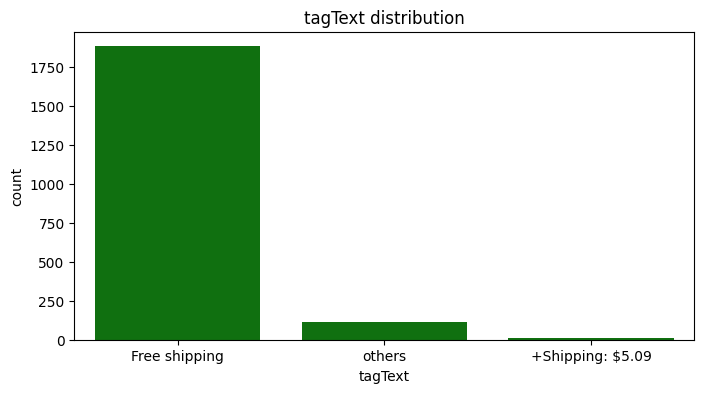

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['tagText'],color='green')
plt.xlabel('tagText')
plt.ylabel('count')
plt.title('tagText distribution')
plt.show()

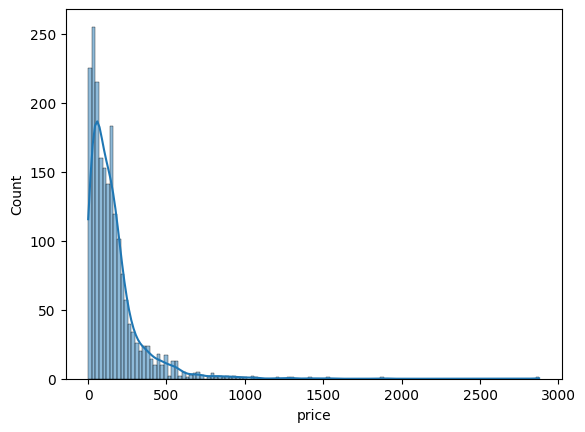

In [17]:
sns.histplot(df['price'],kde=True)
plt.show()

<ipython-input-18-492e86f7d2db>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sold'],color='blue',bins=50,kde=True)


<Axes: xlabel='sold', ylabel='Density'>

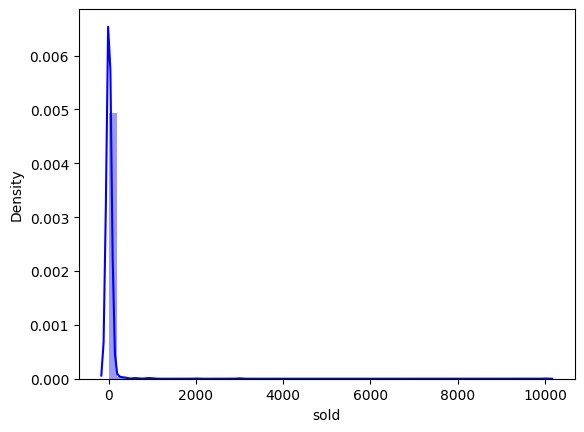

In [18]:
sns.distplot(df['sold'],color='blue',bins=50,kde=True)

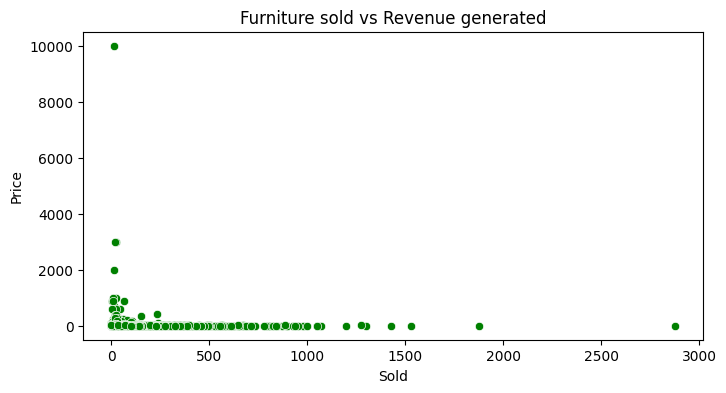

In [19]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=df['price'],y=df['sold'], color='green')
plt.xlabel('Sold')
plt.ylabel('Price')
plt.title('Furniture sold vs Revenue generated')
plt.show()


In [20]:
fs_df=df[df['tagText']=='Free shipping']

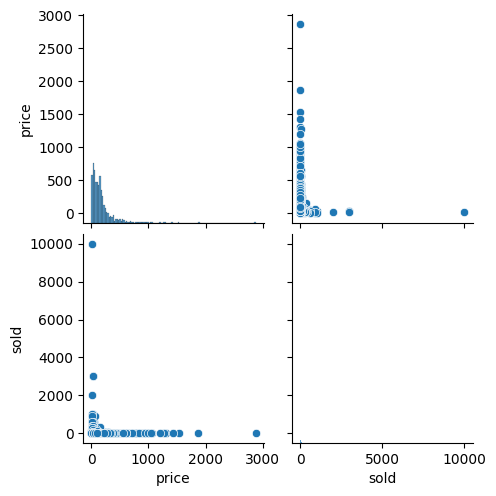

In [21]:
sns.pairplot(fs_df[['price','sold']])

**Data Modeling**

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['tagText']=le.fit_transform(df['tagText'])

In [23]:
df['tagText'].value_counts()

,count
tagText,
1,1880
2,111
0,9


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(max_features=1000)
protit_tf=tf.fit_transform(df['productTitle'])

In [25]:
protit_tf_df=pd.DataFrame(protit_tf.toarray(),columns=tf.get_feature_names_out())
df=pd.concat([df,protit_tf_df],axis=1)

In [26]:
df=df.drop('productTitle',axis=1)

In [27]:
df=df.dropna()

TRAIN-TEST DATA

In [28]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

X=df.drop('sold',axis=1)
y=df['sold']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lm=LinearRegression()

In [31]:
lm.fit(X_train,y_train)

LinearRegression()

In [32]:
lm.score(X_train,y_train)

0.9873208799659835

In [33]:
lm.coef_

array([  1.59655292,  -2.66727712, 172.57071078, ...,   0.        ,
         0.        ,   0.        ])

In [34]:
lm.predict(X_test)

array([-2.98415546e+02,  2.17251767e+03,  2.04694519e+03,  3.13238473e+02,
       -3.05685552e+02,  1.39290074e+02, -1.43581529e+03, -3.12305569e+02,
       -1.12864467e+02, -4.86047832e+02,  1.10664686e+03,  6.06672320e+02,
       -7.58202732e+02,  9.39219197e+02,  3.45441123e+02,  9.99999998e-01,
       -4.53756665e+02,  7.44636336e+02,  4.80050572e+01, -5.30646337e+02,
       -5.24482911e+02, -2.24314586e+02,  7.22505955e+01, -5.26900082e+02,
        5.47732138e+02,  1.19163443e+03, -5.17578103e+02, -3.26985850e+02,
        1.57582396e+02,  6.07424148e+02,  1.20069242e+03,  5.25616117e+01,
        2.60729062e+02,  8.74220860e+02,  1.13315957e+03,  8.00000000e+00,
        7.15745828e+01,  1.15776404e+03,  3.03757491e+01, -8.48533256e+02,
       -1.45698924e+03, -8.09544197e+02,  9.18011065e+02,  4.56070155e+02,
       -3.31041613e+02,  1.41137956e+03, -1.29802382e+02,  1.64876940e+03,
        2.99468344e+01,  1.40603683e+03,  4.05442265e+02,  1.68992718e+03,
       -5.26900082e+02, -

In [35]:
prediction=lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

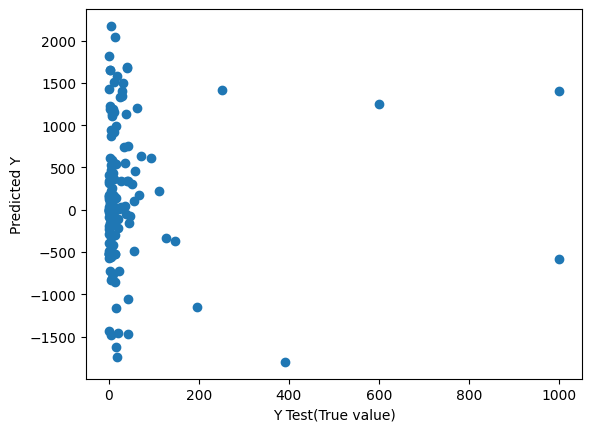

In [36]:
plt.scatter(y_test,prediction)
plt.xlabel('Y Test(True value)')
plt.ylabel('Predicted Y')

In [37]:
from sklearn import metrics

In [38]:
print('MAE', metrics.mean_absolute_error(y_test,prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 583.0654608053494
MSE 641465.0564829956
RMSE 800.9151368796794


<ipython-input-39-35d4b53c5f57>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-prediction),bins=50)


<Axes: xlabel='sold', ylabel='Density'>

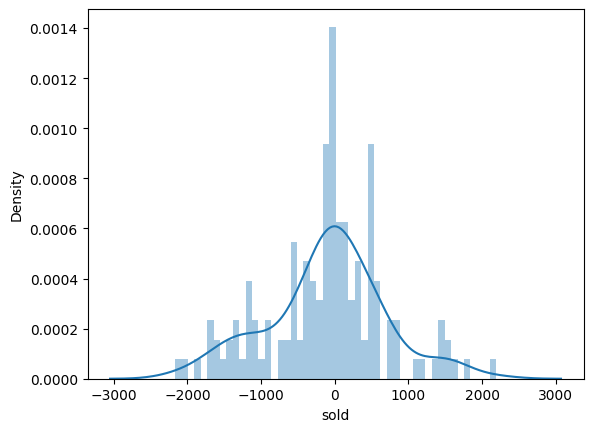

In [39]:
sns.distplot((y_test-prediction),bins=50)

In [40]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
originalPrice,1.596553e+00
price,-2.667277e+00
tagText,1.725707e+02
discount,-2.904482e+01
00,-1.350600e-10
...,...
yanosaku,0.000000e+00
yard,2.308948e+02
yitahome,0.000000e+00
zero,0.000000e+00


In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf=RandomForestClassifier()

In [43]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [44]:
rf.predict(X_test)

array([   9,    2,    2,    2,   17,    3,   64,    8,    3,   45,   12,
          1,    1,    3,    9,    1,    2,    8,    1,    6,    7,    2,
          5,    2,    2,    1,   11,    3,    7,    1,   60,    3,    3,
         10,   12,    8,    2,   14,    2,    1,    5,    1,    1,  332,
        111,  900,    2,    6,   28,   30,   27,   24,    2,    8,    1,
          2,   16,    2,   10,    2,    2,    1,    2,    4,   89,    7,
        111,    2,    8,    6,    3,    1,    1,    2,    2,    1,   26,
        210,    9,    1,   36,    5,    2,    2,   16,    2,    1,  121,
          2,    1,  171,    0,    4,   68,    2,   10,    8,    1,    1,
         19,    3,    5,  121,    7,    4,    4,    2,    3,   38,   12,
          2,    4,  210,  171,   11,   60,   45,   13,    1,    7,    2,
          1,    1,    2,    3,    3,   14,    2,    3,    5,    1, 3000,
         16,    2,  111,    1,    2,    2,  900,    2,    3,   10,   26,
          5,    1,   49,    2])

In [45]:
prediction=rf.predict(X_test)

Text(0, 0.5, 'Predicted Y')

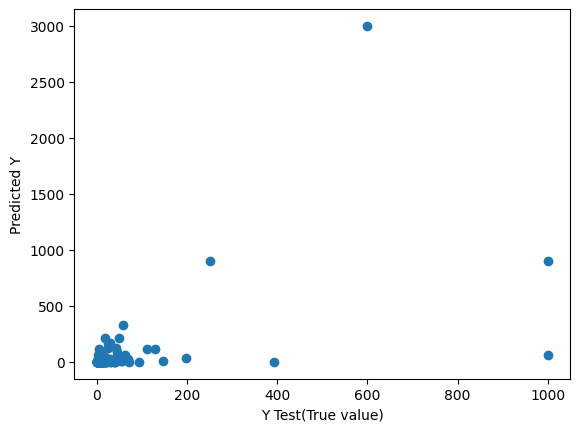

In [46]:
plt.scatter(y_test,prediction)
plt.xlabel('Y Test(True value)')
plt.ylabel('Predicted Y')

In [47]:
print('MAE', metrics.mean_absolute_error(y_test,prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 50.666666666666664
MSE 51202.28571428572
RMSE 226.27922068604911


<ipython-input-48-35d4b53c5f57>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-prediction),bins=50)


<Axes: xlabel='sold', ylabel='Density'>

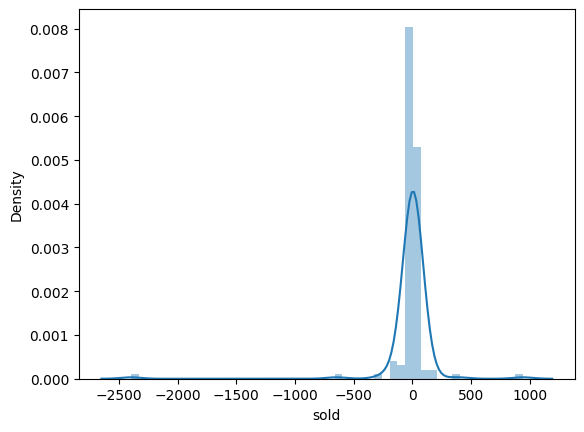

In [48]:
sns.distplot((y_test-prediction),bins=50)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
prediction = logmodel.predict(X_test)


Text(0, 0.5, 'Predicted Y')

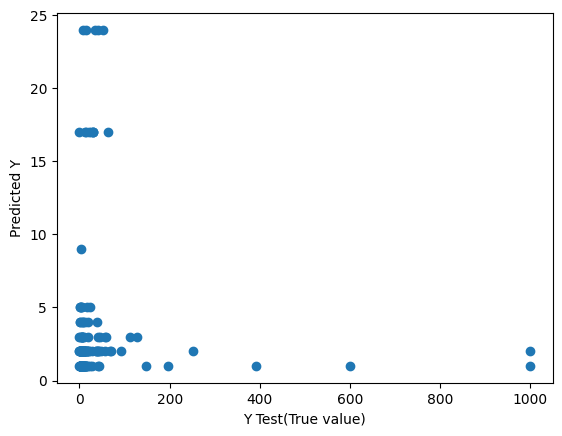

In [52]:
plt.scatter(y_test,prediction)
plt.xlabel('Y Test(True value)')
plt.ylabel('Predicted Y')

In [53]:
print('MAE', metrics.mean_absolute_error(y_test,prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 37.61904761904762
MSE 18451.619047619046
RMSE 135.8367367379644


<ipython-input-54-35d4b53c5f57>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-prediction),bins=50)


<Axes: xlabel='sold', ylabel='Density'>

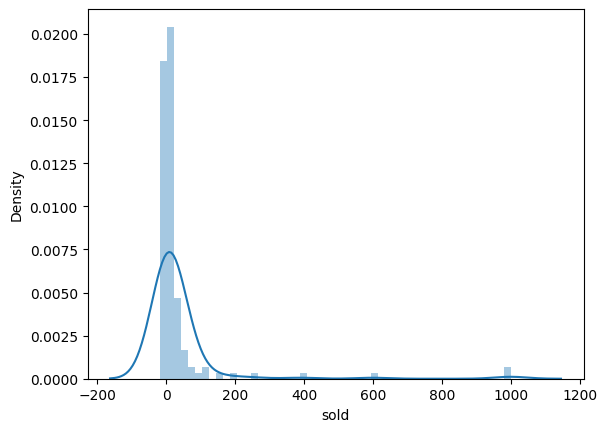

In [54]:
sns.distplot((y_test-prediction),bins=50)

In [55]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
originalPrice,1.596553e+00
price,-2.667277e+00
tagText,1.725707e+02
discount,-2.904482e+01
00,-1.350600e-10
...,...
yanosaku,0.000000e+00
yard,2.308948e+02
yitahome,0.000000e+00
zero,0.000000e+00


In [56]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/ecommerce_furniture_dataset_2024.csv',index=False)